# Assignment-1 Solutions for CS565
This notebook contains solutions for Assignment-1 in two parts, first for english corpus followed by hindi corpus

In [ ]:
# Downloading files
!wget -c 'https://www.dropbox.com/s/1agrh5hdnkqd24c/en_wiki.txt?dl=0' -O en_wiki.txt
!wget -c 'https://www.dropbox.com/s/xrx4r9ep28lq5jp/hi_wiki.txt?dl=0' -O hi_wiki.txt

--2020-10-01 09:54:02--  https://www.dropbox.com/s/1agrh5hdnkqd24c/en_wiki.txt?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/1agrh5hdnkqd24c/en_wiki.txt [following]
--2020-10-01 09:54:03--  https://www.dropbox.com/s/raw/1agrh5hdnkqd24c/en_wiki.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0f497bf6c1ea918671ab10cce9.dl.dropboxusercontent.com/cd/0/inline/BAY4USFugi8fCqODRH7HAv7SkoNWs5uFSohSeTV6YbkOuFUB_j-0frI--ZSHh4OfUxgYB0gySshQSf6mjqQ3EJ7AKwyoqoci_VtmNO0KqrS3Cpt932AcVP1u_uEaf71ybPo/file# [following]
--2020-10-01 09:54:03--  https://uc0f497bf6c1ea918671ab10cce9.dl.dropboxusercontent.com/cd/0/inline/BAY4USFugi8fCqODRH7HAv7SkoNWs5uFSohSeTV6YbkOuFUB_j-0frI--ZSHh4OfUxgYB0gySshQSf6mjqQ3EJ7AKwyoqoci_VtmNO0KqrS3Cpt9

In [ ]:
# Importing all the required libraries

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer 
import spacy
from spacy.lang.en import English
from spacy.tokenizer import Tokenizer
from nltk import *
from nltk.util import ngrams
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from math import floor
from IPython.display import Markdown, display
import random 
!pip install indic-nlp-library
from indicnlp.tokenize import sentence_tokenize, indic_tokenize 
!pip install stanfordnlp
import stanfordnlp
!pip install -U git+https://github.com/aboSamoor/polyglot.git@master
!polyglot download morph2.en
!polyglot download morph2.hi
from polyglot.text import Text, Word
import re, collections

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
  Cloning https://github.com/aboSamoor/polyglot.git (to revision master) to /tmp/pip-req-build-r6i96621
  Running command git clone -q https://github.com/aboSamoor/polyglot.git /tmp/pip-req-build-r6i96621
  Created wheel for polyglot: filename=polyglot-16.7.4-py2.py3-none-any.whl size=70643 sha256=38b56af6e714b26b498767934ed2a2d518a2874143123afa2e9ed009787cd1a7
  Stored in directory: /tmp/pip-ephem-wheel-cache-qrhrole4/wheels/42/d9/73/345c7ae8554299ff8b31635d64eb8455fd591385fa734cdbef
Successfully built polyglot
  Found existing installation: polyglot 16.7.4
    Uninstalling polyglot-16.7.4:
      Successfully uninstalled polyglot-16.7.4
[polyglot_data] Downloading package morph2.en to
[polyg

# Solutions for English Corpus

In [ ]:
# Reading text from given corpus

text = open('/content/en_wiki.txt').read()
text = text[0:len(text)//4]

## 1.3.1 Analysis using existing NLP tools

### 1.3.1.1

In [ ]:
# Using nltk

# Sentence Segmentation
sent_tokenize_list = sent_tokenize(text)

# Word Tokenization
word_tokenize_list = word_tokenize(text)

display(Markdown("## Sentece Segmentation using NLTK"))
print("Number of sentences: "+ str(len(sent_tokenize_list)))
print("First 50 sentences are: ")
print(sent_tokenize_list[:50])
display(Markdown("## Word Tokenization using NLTK"))
print("Number of words: "+ str(len(word_tokenize_list)))
print("First 50 words are: ")
print(word_tokenize_list[:50])

## Sentece Segmentation using NLTK

Number of sentences: 213196
First 50 sentences are: 
['The word "atom" was coined by ancient Greek philosophers.', 'However, these ideas were founded in philosophical and theological reasoning rather than evidence and experimentation.', 'As a result, their views on what atoms look like and how they behave were incorrect.', 'They also could not convince everybody, so atomism was but one of a number of competing theories on the nature of matter.', 'It was not until the 19th century that the idea was embraced and refined by scientists, when the blossoming science of chemistry produced discoveries that only the concept of atoms could explain.', 'In the early 1800s, John Dalton used the concept of atoms to explain why elements always react in ratios of small whole numbers (the law of multiple proportions).', 'For instance, there are two types of tin oxide: one is 88.1% tin and 11.9% oxygen and the other is 78.7% tin and 21.3% oxygen (tin(II) oxide and tin dioxide respectively).', 'This mean

## Word Tokenization using NLTK

Number of words: 5057940
First 50 words are: 
['The', 'word', '``', 'atom', "''", 'was', 'coined', 'by', 'ancient', 'Greek', 'philosophers', '.', 'However', ',', 'these', 'ideas', 'were', 'founded', 'in', 'philosophical', 'and', 'theological', 'reasoning', 'rather', 'than', 'evidence', 'and', 'experimentation', '.', 'As', 'a', 'result', ',', 'their', 'views', 'on', 'what', 'atoms', 'look', 'like', 'and', 'how', 'they', 'behave', 'were', 'incorrect', '.', 'They', 'also', 'could']


In [ ]:
# Using spaCy

nlp = English()
sentencizer = nlp.create_pipe("sentencizer")
nlp.add_pipe(sentencizer)
nlp.max_length = 100000000
doc = nlp(text)

# Sentece Segmentation
sent_tokenize_list_spacy = [sentence.text for sentence in doc.sents]

# Word Tokenization
tokenizer = nlp.Defaults.create_tokenizer(nlp)
word_tokenize_list_spacy = tokenizer(text)

display(Markdown("## Sentece Segmentation using spaCy"))
print("Number of sentences: "+ str(len(sent_tokenize_list_spacy)))
print("First 50 sentences are: ")
print(sent_tokenize_list_spacy[:50])
display(Markdown("## Word Tokenization using spaCy"))
print("Number of words: "+ str(len(word_tokenize_list_spacy)))
print("First 50 words are: ")
print(*word_tokenize_list_spacy[:50], sep=" , ")

## Sentece Segmentation using spaCy

Number of sentences: 212133
First 50 sentences are: 
['The word "atom" was coined by ancient Greek philosophers.', 'However, these ideas were founded in philosophical and theological reasoning rather than evidence and experimentation.', 'As a result, their views on what atoms look like and how they behave were incorrect.', 'They also could not convince everybody, so atomism was but one of a number of competing theories on the nature of matter.', 'It was not until the 19th century that the idea was embraced and refined by scientists, when the blossoming science of chemistry produced discoveries that only the concept of atoms could explain.', '\n\nIn the early 1800s, John Dalton used the concept of atoms to explain why elements always react in ratios of small whole numbers (the law of multiple proportions).', 'For instance, there are two types of tin oxide: one is 88.1% tin and 11.9% oxygen and the other is 78.7% tin and 21.3% oxygen (tin(II) oxide and tin dioxide respectively).', 'This 

## Word Tokenization using spaCy

Number of words: 5229511
First 50 words are: 
The , word , " , atom , " , was , coined , by , ancient , Greek , philosophers , . , However , , , these , ideas , were , founded , in , philosophical , and , theological , reasoning , rather , than , evidence , and , experimentation , . , As , a , result , , , their , views , on , what , atoms , look , like , and , how , they , behave , were , incorrect , . , They , also , could


### 1.3.1.2

10 most common Unigrams are: 
[(('the',), 269127), ((',',), 269120), (('.',), 212501), (('of',), 192358), (('and',), 131288), (('%',), 88930), (('in',), 86403), (('a',), 80479), (('was',), 78225), (('to',), 77802)]
10 least common Unigrams are: 
[(('11–13',), 1), (('Sacramento–Kings',), 1), (('Cauley-Stein',), 1), (('mid-2016',), 1), (('ROCHESTER',), 1), (('city/team',), 1), (('half-basketball',), 1), (("'Royals",), 1), (('1994–97',), 1), (('half-purple',), 1), (('half-black',), 1), (('2008-era',), 1), (('1994–2002',), 1), (("'85–'90",), 1), (('Slamson',), 1), (('climaxing',), 1), (('Zero-coupon',), 1), (('semi-annually',), 1), (('Long-term',), 1), (('maturities',), 1), (('STRIPS',), 1), (('non-callable',), 1), (('bonds—often',), 1), (('issues—to',), 1), (('pieces—the',), 1), (('depository',), 1), (('custodian',), 1), (('agent/registrar',), 1), (('Pension',), 1), (('immunize',), 1), (('impute',), 1), (('tax-deferred',), 1), (('tax-savings',), 1), (('loopholes',), 1), (('accrual',), 1),

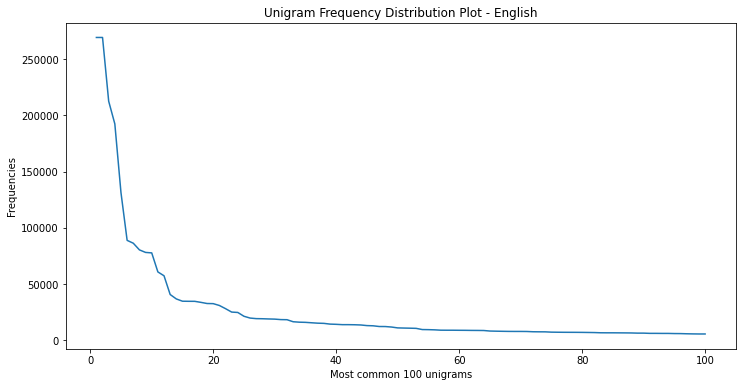

In [ ]:
# Unigrams and plot for frequency distribution

uni_grams = ngrams(word_tokenize(text),1)
fdist_uni = nltk.FreqDist(uni_grams)

print("10 most common Unigrams are: ")
print(fdist_uni.most_common(10))
print("10 least common Unigrams are: ")
print(fdist_uni.most_common()[-100:])

freq_values = sorted(fdist_uni.values(), reverse=True)
x_labels = [ i for i in range(1,101)]
plt.figure(figsize=(12, 6))
plt.title("Unigram Frequency Distribution Plot - English")
plt.xlabel("Most common 100 unigrams")
plt.ylabel("Frequencies")
plt.plot(x_labels,freq_values[:100])
plt.show()


### 1.3.1.3

10 most common Bigrams are: 
[(('.', 'The'), 55748), (('of', 'the'), 49982), ((',', 'and'), 40002), (('in', 'the'), 29304), (('%', 'of'), 21400), ((',', 'the'), 19033), (('%', 'from'), 16433), (('and', 'the'), 15595), (('to', 'the'), 14677), (('.', 'In'), 14600)]


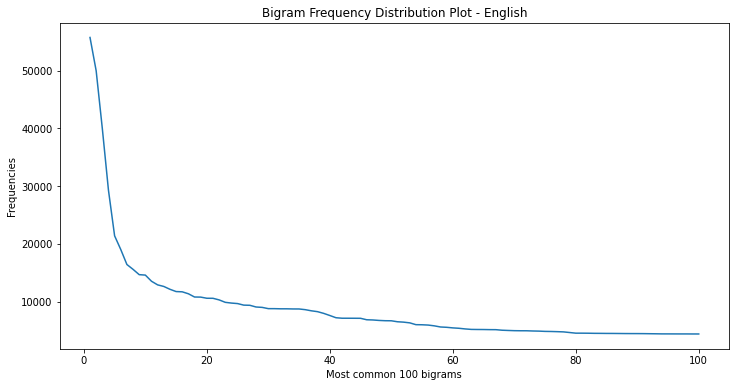

In [ ]:
# Bigrams and plot for frequency distribution

bi_grams = ngrams(word_tokenize(text),2)
fdist_bi = nltk.FreqDist(bi_grams)

print("10 most common Bigrams are: ")
print(fdist_bi.most_common(10))

freq_values = sorted(fdist_bi.values(), reverse=True)
x_labels = [ i for i in range(1,101) ]
plt.figure(figsize=(12, 6))
plt.title("Bigram Frequency Distribution Plot - English")
plt.xlabel("Most common 100 bigrams")
plt.ylabel("Frequencies")
plt.plot(x_labels,freq_values[:100])
plt.show()

### 1.3.1.4

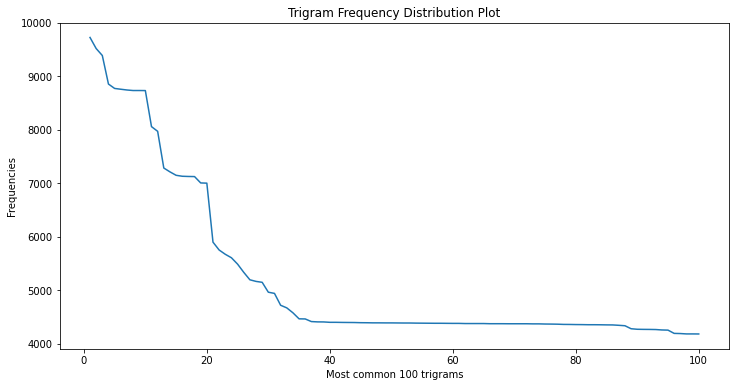

In [ ]:
# Trigrams and plot for frequency distribution

tri_grams = ngrams(word_tokenize(text),3)
fdist_tri = nltk.FreqDist(tri_grams)

print("10 most common Trigrams are: ")
print(fdist_tri.most_common(10))

freq_values = sorted(fdist_tri.values(), reverse=True)
x_labels = [ i for i in range(1,101) ]
plt.figure(figsize=(12, 6))
plt.title("Trigram Frequency Distribution Plot")
plt.xlabel("Most common 100 trigrams")
plt.ylabel("Frequencies")
plt.plot(x_labels,freq_values[:100])
plt.show()

### Zipf's law curve fitting

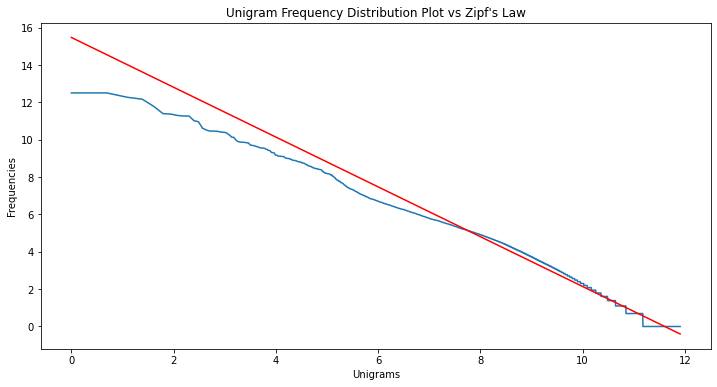

Slope: -1.3329679351853299
Intercept: 15.471324627261797


In [ ]:
# Getting log values for frequency plot
freq_values = sorted(fdist_uni.values(), reverse=True)
x_labels = [ i for i in range(1,len(freq_values)+1) ]
log_freq_values = np.asarray([np.log(i) for i in freq_values])
log_x_labels = np.asarray([np.log(i) for i in x_labels])
plt.figure(figsize=(12, 6))
plt.title("Unigram Frequency Distribution Plot vs Zipf's Law")
plt.xlabel("Unigrams")
plt.ylabel("Frequencies")

slope, intercept = np.polyfit(log_x_labels, log_freq_values, 1)
plt.plot(log_x_labels,log_freq_values)
plt.plot(log_x_labels, slope*log_x_labels+intercept, color="red")
plt.show()
print("Slope: "+str(slope))
print("Intercept: "+str(intercept))

## 1.3.2 Few Basic Questions

In [ ]:
def get_coverage_number(total_grams, percentage, freq_values):
  required_grams = 0
  gram_coverage = 0
  for freq in freq_values:
    if gram_coverage <= percentage*total_grams:
      required_grams += 1
      gram_coverage += freq
    else:
      break
  return required_grams

### 1.3.2.1

In [ ]:
total_unigrams = fdist_uni.N()
freq_values = sorted(fdist_uni.values(), reverse=True)
required_unigrams = get_coverage_number(total_unigrams, 0.9, freq_values)
print("Total number of unigrams: "+str(total_unigrams))
print("Uni-grams required for 90% coverage: "+str(required_unigrams))

Total number of unigrams: 5057940
Uni-grams required for 90% coverage: 8947


### 1.3.2.2

In [ ]:
total_bigrams = fdist_bi.N()
freq_values = sorted(fdist_bi.values(), reverse=True)
required_bigrams = get_coverage_number(total_bigrams, 0.8, freq_values)
print("Total number of bigrams: "+str(total_bigrams))
print("Bi-grams required for 80% coverage: "+str(required_bigrams))

Total number of bigrams: 5057939
Bi-grams required for 80% coverage: 242884


### 1.3.2.3

In [ ]:
total_trigrams = fdist_tri.N()
freq_values = sorted(fdist_tri.values(), reverse=True)
required_trigrams = get_coverage_number(total_trigrams, 0.7, freq_values)
print("Total number of trigrams: "+str(total_trigrams))
print("Tri-grams required for 70% coverage: "+str(required_trigrams))

Total number of trigrams: 5057938
Tri-grams required for 70% coverage: 992668


### 1.3.2.4

In [ ]:
# Performing Stemming on text

word_tokenize_list = word_tokenize(text)
ps = PorterStemmer() 
stemmed_words = []
for w in word_tokenize_list: 
	stemmed_words.append(ps.stem(w))

In [ ]:
new_uni_grams = ngrams(stemmed_words,1)
new_fdist_uni = nltk.FreqDist(new_uni_grams)

new_bi_grams = ngrams(stemmed_words,2)
new_fdist_bi = nltk.FreqDist(new_bi_grams)

new_tri_grams = ngrams(stemmed_words,3)
new_fdist_tri = nltk.FreqDist(new_tri_grams)

In [ ]:
total_unigrams = new_fdist_uni.N()
freq_values = sorted(new_fdist_uni.values(), reverse=True)
required_unigrams = get_coverage_number(total_unigrams, 0.9, freq_values)
display(Markdown("### After Stemming"))
print("Total number of unigrams: "+str(total_unigrams))
print("Uni-grams required for 90% coverage: "+str(required_unigrams))

### After Stemming

Total number of unigrams: 5057940
Uni-grams required for 90% coverage: 4270


In [ ]:
total_bigrams = new_fdist_bi.N()
freq_values = sorted(new_fdist_bi.values(), reverse=True)
required_bigrams = get_coverage_number(total_bigrams, 0.8, freq_values)
display(Markdown("### After Stemming"))
print("Total number of bigrams: "+str(total_bigrams))
print("Bi-grams required for 80% coverage: "+str(required_bigrams))

### After Stemming

Total number of bigrams: 5057939
Bi-grams required for 80% coverage: 160317


In [ ]:
total_trigrams = new_fdist_tri.N()
freq_values = sorted(new_fdist_tri.values(), reverse=True)
required_trigrams = get_coverage_number(total_trigrams, 0.7, freq_values)
display(Markdown("### After Stemming"))
print("Total number of trigrams: "+str(total_trigrams))
print("Tri-grams required for 70% coverage: "+str(required_trigrams))

### After Stemming

Total number of trigrams: 5057938
Tri-grams required for 70% coverage: 884495


## 1.3.3 Writing some of basic codes

### 1.3.3.1 Heuristics for sentence segmentation and word tokenization

In [ ]:
# implementing discussed heuristics in the class for sentence segmentation and word tokenization

abbreviations = "Mr mr Mrs mrs Ms ms Dr dr Prof prof Mt mt Resp resp vs Fig fig Figs figs Jr jr Ph.D e.g E.g B.Tech M.Tech B.Sc M.Sc".split()

sentences_with_heuristics = []
words_with_heuristics = []

token_list = text.split()
token_list_length  = len(token_list)

current_sentence = []
i=0
for token in token_list:
  if token != "":
    current_sentence.append(token)
    if token[-1] == '.':
      if token[:-1] not in abbreviations:
        sentences_with_heuristics.append(' '.join(current_sentence))
        current_sentence = []
    if token[-1] == '!' or token[-1] == '?':
      if i+1 < token_list_length:
        if token_list[i+1][0].isupper():
          sentences_with_heuristics.append(current_sentence)
          current_sentence = []
      else:
        sentences_with_heuristics.append(' '.join(current_sentence))
        current_sentence = []

    if token[-1] == '.':
      if token[:-1] in abbreviations:
        words_with_heuristics.append(token)
    else:
      splitted_word = re.findall(r"[a-zA-Z\-]+|[^\s\w\-]|[_]", token)
      for split in splitted_word:
        words_with_heuristics.append(split)
  i+=1

In [ ]:
# Repeating 1.3.2

display(Markdown("## Results after implementing heuristics:"))
print("\nNumber of sentences: "+ str(len(sentences_with_heuristics)))
print("First 10 sentences are: ")
print(sentences_with_heuristics[:10])
print("\nNumber of words: "+ str(len(words_with_heuristics)))
print("First 10 words are: ")
print(words_with_heuristics[:10])

uni_grams_hue = ngrams(words_with_heuristics,1)
fdist_uni_hue = nltk.FreqDist(uni_grams_hue)
total_unigrams = fdist_uni_hue.N()
freq_values = sorted(fdist_uni_hue.values(), reverse=True)
required_unigrams = get_coverage_number(total_unigrams, 0.9, freq_values)
print("\nTotal number of unigrams: "+str(total_unigrams))
print("Uni-grams required for 90% coverage: "+str(required_unigrams))

bi_grams_hue = ngrams(words_with_heuristics,2)
fdist_bi_hue = nltk.FreqDist(bi_grams_hue)
total_bigrams = fdist_bi_hue.N()
freq_values = sorted(fdist_bi_hue.values(), reverse=True)
required_bigrams = get_coverage_number(total_bigrams, 0.8, freq_values)
print("\nTotal number of bigrams: "+str(total_bigrams))
print("Bi-grams required for 90% coverage: "+str(required_bigrams))

tri_grams_hue = ngrams(words_with_heuristics,3)
fdist_tri_hue = nltk.FreqDist(tri_grams_hue)
total_trigrams = fdist_tri_hue.N()
freq_values = sorted(fdist_tri_hue.values(), reverse=True)
required_trigrams = get_coverage_number(total_trigrams, 0.8, freq_values)
print("\nTotal number of trigrams: "+str(total_trigrams))
print("Tri-grams required for 90% coverage: "+str(required_trigrams))

## Results after implementing heuristics:


Number of sentences: 216829
First 10 sentences are: 
['The word "atom" was coined by ancient Greek philosophers.', 'However, these ideas were founded in philosophical and theological reasoning rather than evidence and experimentation.', 'As a result, their views on what atoms look like and how they behave were incorrect.', 'They also could not convince everybody, so atomism was but one of a number of competing theories on the nature of matter.', 'It was not until the 19th century that the idea was embraced and refined by scientists, when the blossoming science of chemistry produced discoveries that only the concept of atoms could explain.', 'In the early 1800s, John Dalton used the concept of atoms to explain why elements always react in ratios of small whole numbers (the law of multiple proportions).', 'For instance, there are two types of tin oxide: one is 88.1% tin and 11.9% oxygen and the other is 78.7% tin and 21.3% oxygen (tin(II) oxide and tin dioxide respectively).', 'This mea

In [ ]:
# Performing Stemming on text

word_tokenize_list_new = words_with_heuristics
ps = PorterStemmer() 
stemmed_words = []
for w in word_tokenize_list_new: 
	stemmed_words.append(ps.stem(w))

In [ ]:
new_uni_grams = ngrams(stemmed_words,1)
new_fdist_uni = nltk.FreqDist(new_uni_grams)

new_bi_grams = ngrams(stemmed_words,2)
new_fdist_bi = nltk.FreqDist(new_bi_grams)

new_tri_grams = ngrams(stemmed_words,3)
new_fdist_tri = nltk.FreqDist(new_tri_grams)

In [ ]:
total_unigrams = new_fdist_uni.N()
freq_values = sorted(new_fdist_uni.values(), reverse=True)
required_unigrams = get_coverage_number(total_unigrams, 0.9, freq_values)
display(Markdown("### After Stemming"))
print("Total number of unigrams: "+str(total_unigrams))
print("Uni-grams required for 90% coverage: "+str(required_unigrams))

### After Stemming

Total number of unigrams: 4496840
Uni-grams required for 90% coverage: 2571


In [ ]:
total_bigrams = new_fdist_bi.N()
freq_values = sorted(new_fdist_bi.values(), reverse=True)
required_bigrams = get_coverage_number(total_bigrams, 0.8, freq_values)
display(Markdown("### After Stemming"))
print("Total number of bigrams: "+str(total_bigrams))
print("Bi-grams required for 80% coverage: "+str(required_bigrams))

### After Stemming

Total number of bigrams: 4496839
Bi-grams required for 80% coverage: 123094


In [ ]:
total_trigrams = new_fdist_tri.N()
freq_values = sorted(new_fdist_tri.values(), reverse=True)
required_trigrams = get_coverage_number(total_trigrams, 0.7, freq_values)
display(Markdown("### After Stemming"))
print("Total number of trigrams: "+str(total_trigrams))
print("Tri-grams required for 70% coverage: "+str(required_trigrams))

### After Stemming

Total number of trigrams: 4496838
Tri-grams required for 70% coverage: 740085


### 1.3.3.2 Likelihood Ratios

In [ ]:
# to calulate the the terms log L(k,n,x)
def get_log_term_L(k, n, x):
  return k*np.log(x) + (n-k)*np.log(1-x)

# to get log(lambda)
def get_likelihood_ratio(c1, c2, c12, N):
  p = c2/N
  p1 = c12/c1
  p2 = (c2-c12)/(N-c1)

  val = get_log_term_L(c12,c1,p) + get_log_term_L(c2-c12,N-c1,p) - get_log_term_L(c12,c1,p1) - get_log_term_L(c2-c12,N-c1,p2)
  if np.isnan(val):
    return 0
  return val

In [ ]:
likelihood_ratios = {}
for bigram,freq in fdist_bi.items():
  word1 = bigram[0]
  word2 = bigram[1]
  c12 = freq
  N = fdist_bi.N()
  c1 = fdist_uni[(word1,)]
  c2 = fdist_uni[(word2,)]
  likelihood_ratios[bigram] = -2*get_likelihood_ratio(c1,c2,c12,N)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
display(Markdown("## 100 words with highest likelihood ratios"))
print(sorted(likelihood_ratios.items(),key= lambda x:x[1],reverse=True)[:100])

## 100 words with highest likelihood ratios

[(('.', 'The'), 333936.8996407627), (('median', 'income'), 115956.15171755284), (('United', 'States'), 110013.2887814854), (('every', '100'), 99338.46873299748), (('For', 'every'), 96304.95461700024), (('there', 'were'), 95542.04330000875), (('of', 'the'), 95200.56195354159), (('65', 'years'), 95053.39687368485), (('or', 'older'), 91256.22878809928), (('%', 'from'), 90929.23565034487), (('income', 'for'), 90548.86368263437), (('100', 'females'), 89850.56978701243), ((',', 'and'), 87828.82690197392), (('.', 'In'), 87398.18608974383), (('%', 'had'), 77531.9256763526), (('There', 'were'), 76947.61648335797), (('square', 'mile'), 71554.7893528475), (('size', 'was'), 70794.79810442438), (('in', 'the'), 70007.12665836932), (('housing', 'units'), 67742.5444012069), (('.', 'There'), 67401.62279065733), (('married', 'couples'), 66819.23093711394), (('racial', 'makeup'), 65212.425912015824), (('was', '$'), 65197.22013117431), (('husband', 'present'), 59807.999748751376), (('per', 'square'), 5954

## 1.3.4 Morphological parsing

In [ ]:
word_tokenize_list = word_tokenize(text)
freq_dist_ordered_list = FreqDist(word_tokenize_list).most_common()
most_frequent_words = freq_dist_ordered_list[:100]
least_frequent_words = freq_dist_ordered_list[-100:]

In [ ]:
random.seed(13)
random_5_most_frequent = random.sample(most_frequent_words, 5)
random_5_least_frequent = random.sample(least_frequent_words, 5)

In [ ]:
most_frequent_morphemes = []
for w in random_5_most_frequent:
  w = Word(w[0], language="en")
  most_frequent_morphemes.append(w.morphemes)
least_frequent_morphemes = []
for w in random_5_least_frequent:
  w = Word(w[0], language="en")
  least_frequent_morphemes.append(w.morphemes)

text_most_frequent = [i[0] for i in random_5_most_frequent]
text_least_frequent = [i[0] for i in random_5_least_frequent]
pos_tag_most_frequent = pos_tag(text_most_frequent)
pos_tag_least_frequent = pos_tag(text_least_frequent)

display(Markdown("## Morphological Analysis"))
display(Markdown("### For random 5 words from 100 most frequent"))
display(Markdown("### Word --> morphemes + POS Tag"))
for index in range(5):
  print(random_5_most_frequent[index][0] + " --> " + str(most_frequent_morphemes[index]) + " + " + pos_tag_most_frequent[index][1])
display(Markdown("### For random 5 words from 100 least frequent"))
display(Markdown("### Word --> morphemes + POS Tag"))
for index in range(5):
  print(random_5_least_frequent[index][0] + " --> " + str(least_frequent_morphemes[index]) + " + " + pos_tag_least_frequent[index][1])

## Morphological Analysis

### For random 5 words from 100 most frequent

### Word --> morphemes + POS Tag

city --> ['city'] + NN
median --> ['media', 'n'] + JJ
Township --> ['Town', 'ship'] + NNP
had --> ['had'] + VBD
first --> ['first'] + JJ


### For random 5 words from 100 least frequent

### Word --> morphemes + POS Tag

immunize --> ['imm', 'un', 'ize'] + VB
handbills --> ['hand', 'bill', 's'] + NNS
Long-term --> ['Long', '-', 'term'] + JJ
Pension --> ['Pen', 's', 'ion'] + NNP
Purrington --> ['Pur', 'ring', 'ton'] + NNP


## 1.3.5 Sub-word tokenization(BPE)

In [ ]:
# Defining functions for BPE

def get_vocab(freq_dist):
  vocab = {}
  for key, value in freq_dist.items():
    if(key[0].isalpha()):
      word = " ".join(key[0]) + " </w>"
      vocab[word] = value
  return vocab

def get_stats(vocab):
    pairs = collections.defaultdict(int)
    for word, freq in vocab.items():
      symbols = word.split()
      for i in range(len(symbols)-1):
        pairs[symbols[i],symbols[i+1]] += freq
    return pairs

def merge_vocab(pair, v_in):
    v_out = {}
    bigram = re.escape(' '.join(pair))
    p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')
    for word in v_in:
      w_out = p.sub(''.join(pair), word)
      v_out[w_out] = v_in[word]
    return v_out

def get_tokens(pair, v_in): 
  v_out = []
  bigram = re.escape(' '.join(pair))
  p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')
 
  for word in v_in:
    w_out = p.sub(''.join(pair), word)
    v_out.append(w_out)

  return v_out

In [ ]:
# Leaning merges

fdist_uni_dict = dict(fdist_uni)
vocab = dict(list(get_vocab(fdist_uni_dict).items())[:3000])

learned_merges = []
num_merges = 4500

for i in range(num_merges):
    pairs = get_stats(vocab)
    if not pairs:
      print("I broke at " + str(i))
      break
    best = max(pairs, key=pairs.get)
    learned_merges.append((best,pairs[best]))
    vocab = merge_vocab(best, vocab)

In [ ]:
sorted_learned_merges = sorted(learned_merges, key = lambda x: x[1])
display(Markdown("### 50 most frequent tokens"))
print(sorted_learned_merges[-50:])
display(Markdown("### 50 least frequent tokens"))
print(sorted_learned_merges[:50])

### 50 most frequent tokens

[(('a', 'n</w>'), 32939), (('h', 'a'), 32955), (('o', 'n</w>'), 35217), (('g', '</w>'), 35360), (('h', '</w>'), 35764), (('f', 'or</w>'), 36913), (('w', 'i'), 37960), (('e', 'n'), 38530), (('i', 'c'), 38795), (('th', '</w>'), 40202), (('a', 't</w>'), 40793), (('r', 'e'), 41529), (('a', 'ge</w>'), 46054), (('o', 'u'), 46801), (('a', 't'), 46827), (('m', '</w>'), 48060), (('g', 'e</w>'), 50105), (('r', 'o'), 55490), (('w', 'ere</w>'), 57475), (('e', 'd</w>'), 57657), (('a', 'l'), 58693), (('Th', 'e</w>'), 60898), (('i', 's</w>'), 63574), (('i', 't'), 64055), (('a', 'r'), 72088), (('i', 'n'), 74706), (('or', '</w>'), 75788), (('w', 'as</w>'), 78225), (('T', 'h'), 78631), (('t', 'o</w>'), 81790), (('er', 'e</w>'), 85152), (('er', '</w>'), 89945), (('i', 'n</w>'), 92937), (('a', '</w>'), 96057), (('o', '</w>'), 109303), (('o', 'r'), 116065), (('a', 's</w>'), 116073), (('y', '</w>'), 121554), (('an', 'd</w>'), 138191), (('t', '</w>'), 145336), (('a', 'n'), 167203), (('o', 'f</w>'), 192358), 

### 50 least frequent tokens

[(('hy', 'po'), 10), (('hypo', 'the'), 10), (('hypothe', 'sized</w>'), 10), (('quanti', 'zation</w>'), 10), (('S', 'ch'), 10), (('Sch', 'r'), 10), (('Schr', 'ö'), 10), (('Schrö', 'ding'), 10), (('Schröding', 'er</w>'), 10), (('A', 'st'), 10), (('Ast', 'on</w>'), 10), (('nucle', 'ons</w>'), 10), (('bo', 's'), 10), (('bos', 'ons</w>'), 10), (('Pau', 'li'), 10), (('Pauli', '</w>'), 10), (('ion', 'ic</w>'), 10), (('P', 'lan'), 10), (('Plan', 'ck</w>'), 10), (('spontan', 'e'), 10), (('spontane', 'ously</w>'), 10), (('bot', 'ani'), 11), (('botani', 'st</w>'), 11), (('po', 'st'), 11), (('post', 'ulated</w>'), 11), (('G', 'ei'), 11), (('Gei', 'ger</w>'), 11), (('diff', 'use</w>'), 11), (('N', 'i'), 11), (('Ni', 'els</w>'), 11), (('or', 'bits</w>'), 11), (('ha', 'd'), 11), (('e', 'jec'), 11), (('col', 'li'), 11), (('colli', 'sion</w>'), 11), (('equival', 'ence</w>'), 11), (('nucli', 'des</w>'), 11), (('de', 'vi'), 11), (('scan', 'ning</w>'), 11), (('ma', 'cro'), 11), (('macro', 'scop'), 11), ((

In [ ]:
# Tokenization for 10 unknown words
unknown_words = ['abstruse', 'bilk', 'enervate', 'accomodate', 'multifarious', 'cajole', 'reprobate', 'swarthy', 'covet', 'bashful']

unknown_words_list = [ ' '.join(w)+" </w>" for w in unknown_words]
for lm in learned_merges:
  unknown_words_list = get_tokens(lm[0], unknown_words_list)

display(Markdown("## Tokenization of unknown words"))
for i in range(10):
  print(unknown_words[i] + ' --> ' + str(unknown_words_list[i][:-4].split()))

## Tokenization of unknown words

abstruse --> ['ab', 'str', 'use']
bilk --> ['b', 'il', 'k']
enervate --> ['ener', 'v', 'ate']
accomodate --> ['ac', 'com', 'od', 'ate']
multifarious --> ['multi', 'f', 'ar', 'i', 'ous']
cajole --> ['ca', 'j', 'ole']
reprobate --> ['re', 'prob', 'ate']
swarthy --> ['s', 'w', 'ar', 'th', 'y']
covet --> ['co', 've', 't']
bashful --> ['b', 'a', 'sh', 'ful']


In [ ]:
display(Markdown("## Comparison of tokens with morphemes"))

unknown_words_list = [ ' '.join(w[0])+" </w>" for w in random_5_most_frequent]
for lm in learned_merges:
  unknown_words_list = get_tokens(lm[0], unknown_words_list)

display(Markdown("### For random 5 words from 100 most frequent"))
print("\nWord" + "    -->    " + "From Polyglot" + "    and    " + "From BPE \n" )
i=0
for pair in random_5_most_frequent:
  word = pair[0]
  morphemes = Word(word, language="en").morphemes
  print(word + "    -->    " + str(morphemes) + "    and    " +str(unknown_words_list[i][:-4].split()) + ' \n')
  i+=1

unknown_words_list = [ ' '.join(w[0])+" </w>" for w in random_5_least_frequent]
for lm in learned_merges:
  unknown_words_list = get_tokens(lm[0], unknown_words_list)

display(Markdown("### For random 5 words from 100 least frequent"))
print("\nWord" + "    -->    " + "From Polyglot" + "    and    " + "From BPE \n" )
i=0
for pair in random_5_least_frequent:
  word = pair[0]
  morphemes = Word(word, language="en").morphemes
  print(word + "    -->    " + str(morphemes) + "    and    " +str(unknown_words_list[i][:-4].split()) + ' \n')
  i+=1

## Comparison of tokens with morphemes

### For random 5 words from 100 most frequent


Word    -->    From Polyglot    and    From BPE 

city    -->    ['city']    and    ['city'] 

median    -->    ['media', 'n']    and    ['medi', 'an'] 

Township    -->    ['Town', 'ship']    and    ['T', 'ow', 'n', 'ship'] 

had    -->    ['had']    and    ['had'] 

first    -->    ['first']    and    ['first'] 



### For random 5 words from 100 least frequent


Word    -->    From Polyglot    and    From BPE 

immunize    -->    ['imm', 'un', 'ize']    and    ['imm', 'uni', 'ze'] 

handbills    -->    ['hand', 'bill', 's']    and    ['hand', 'b', 'il', 'ls'] 

Long-term    -->    ['Long', '-', 'term']    and    ['Lon', 'g', '-', 'term'] 

Pension    -->    ['Pen', 's', 'ion']    and    ['P', 'en', 'sion'] 

Purrington    -->    ['Pur', 'ring', 'ton']    and    ['P', 'ur', 'r', 'ing', 'ton'] 



# Solutions for Hindi Corpus

In [ ]:
# Reading text from given corpus

hi_text = open('/content/hi_wiki.txt').read()
hi_text = hi_text[0:len(hi_text)//4]

## 1.3.1 Ananlysis using existing NLP tools

### 1.3.1.1

In [ ]:
# Sentence segmentation using indicnlp
sent_tokenize_list_hi = sentence_tokenize.sentence_split(hi_text, lang='hi')

# Word tokenization using indicnlp
word_tokenize_list_hi = indic_tokenize.trivial_tokenize(hi_text)

display(Markdown("## Sentece Segmentation using IndicNLP"))
print("Number of sentences: "+ str(len(sent_tokenize_list_hi)))
print("First 50 sentences are: ")
print(sent_tokenize_list_hi[:50])
display(Markdown("## Word Tokenization using IndicNLP"))
print("Number of words: "+ str(len(word_tokenize_list_hi)))
print("First 50 words are: ")
print(word_tokenize_list_hi[:50])

## Sentece Segmentation using IndicNLP

Number of sentences: 86882
First 50 sentences are: 
['मास्टर ऑफ़ हेल्थ एडमिनिस्ट्रेशन या मास्टर ऑफ हेल्थकेयर एडमिनिस्ट्रेशन (एमएचए या एम. एच. ए) स्नातकोत्तर (पोस्ट ग्रेजुएशन) की एक पेशेवर डिग्री है जो स्वास्थ्य प्रशासन के क्षेत्र में दी जाती हैं।', 'यह उन छात्रों को प्रदान की जाती हैं जिन्होंने स्वास्थ्य प्रशासन, अस्पताल प्रबंधन एवं अन्य स्वास्थ्य सेवा संगठनों के क्षेत्र में जरूरी ज्ञान और दक्षता हासिल की हैं।', 'इन पाठ्यक्रमो में परिस्थितियों के अनुसार इनके सरंचना में अंतर हो सकता हैं हालांकि व्यवसायी-शिक्षक मॉडल कार्यक्रम आमतौर पर चिकित्सा, स्वास्थ्य व्यवसायों या संबद्ध स्वास्थ्य के कॉलेजों में पाए जाते हैं, कक्षा-आधारित कार्यक्रम व्यवसाय या सार्वजनिक स्वास्थ्य के कॉलेजों में होते हैं।', 'इस पाठ्यक्रम के अध्ययन के दौरान आम तौर पर विद्यार्थियों को जनसंख्या स्वास्थ्य, स्वास्थ्य देखभाल अर्थशास्त्र, स्वास्थ्य नीति, संगठनात्मक व्यवहार, स्वास्थ्य से जुड़े संगठनों के प्रबंधन, स्वास्थ्य विपणन और संचार, मानव संसाधन प्रबंधन, सूचना प्रणाली प्रबंधन के अध्ययन एवं अन्य क्षेत्रों में व्यावहारिक अनु

## Word Tokenization using IndicNLP

Number of words: 2160191
First 50 words are: 
['मास्टर', 'ऑफ़', 'हेल्थ', 'एडमिनिस्ट्रेशन', 'या', 'मास्टर', 'ऑफ', 'हेल्थकेयर', 'एडमिनिस्ट्रेशन', '(', 'एमएचए', 'या', 'एम', '.', 'एच', '.', 'ए', ')', 'स्नातकोत्तर', '(', 'पोस्ट', 'ग्रेजुएशन', ')', 'की', 'एक', 'पेशेवर', 'डिग्री', 'है', 'जो', 'स्वास्थ्य', 'प्रशासन', 'के', 'क्षेत्र', 'में', 'दी', 'जाती', 'हैं', '।', 'यह', 'उन', 'छात्रों', 'को', 'प्रदान', 'की', 'जाती', 'हैं', 'जिन्होंने', 'स्वास्थ्य', 'प्रशासन', ',']


In [ ]:
stanfordnlp.download('hi')
nlp = stanfordnlp.Pipeline(processors = "tokenize", lang="hi")

# Sentence Segmentation Using stanfordnlp
doc = nlp(hi_text)
sent_tokenize_list_stanfordnlp = []
for i, sentence in enumerate(doc.sentences):
    sent = ' '.join(word.text for word in sentence.words)
    sent_tokenize_list_stanfordnlp.append(sent)

# Word tokenization using stanfordnlp
word_tokenize_list_stanfordnlp = []
for sent in doc.sentences:
    for word in sent.words:
      word_tokenize_list_stanfordnlp.append(word)

display(Markdown("## Sentece Segmentation using StanfordNLP"))
print("Number of sentences: "+ str(len(sent_tokenize_list_stanfordnlp)))
print("First 50 sentences are: ")
print(sent_tokenize_list_stanfordnlp[:50])
display(Markdown("## Word Tokenization using StanfordNLP"))
print("Number of words: "+ str(len(word_tokenize_list_stanfordnlp)))
print("First 50 words are: ")
print(word_tokenize_list_stanfordnlp[:50])

Using the default treebank "hi_hdtb" for language "hi".
Would you like to download the models for: hi_hdtb now? (Y/n)
y

Default download directory: /root/stanfordnlp_resources
Hit enter to continue or type an alternate directory.


Download location: /root/stanfordnlp_resources/hi_hdtb_models.zip


100%|██████████| 208M/208M [02:33<00:00, 1.35MB/s]



Download complete.  Models saved to: /root/stanfordnlp_resources/hi_hdtb_models.zip
Extracting models file for: hi_hdtb
Cleaning up...Done.
Use device: cpu
---
Loading: tokenize
With settings: 
{'model_path': '/root/stanfordnlp_resources/hi_hdtb_models/hi_hdtb_tokenizer.pt', 'lang': 'hi', 'shorthand': 'hi_hdtb', 'mode': 'predict'}
Done loading processors!
---


## Sentece Segmentation using StanfordNLP

Number of sentences: 91130
First 50 sentences are: 
['मास्टर ऑफ़ हेल्थ एडमिनिस्ट्रेशन या मास्टर ऑफ हेल्थकेयर एडमिनिस्ट्रेशन ( एमएचए या एम.एच.ए ) स्नातकोत्तर ( पोस्ट ग्रेजुएशन ) की एक पेशेवर डिग्री है जो स्वास्थ्य प्रशासन के क्षेत्र में दी जाती हैं ।', 'यह उन छात्रों को प्रदान की जाती हैं जिन्होंने स्वास्थ्य प्रशासन , अस्पताल प्रबंधन एवं अन्य स्वास्थ्य सेवा संगठनों के क्षेत्र में जरूरी ज्ञान और दक्षता हासिल की हैं ।', 'इन पाठ्यक्रमो में परिस्थितियों के अनुसार इनके सरंचना में अंतर हो सकता हैं', 'हालांकि व्यवसायी-शिक्षक मॉडल कार्यक्रम आमतौर पर चिकित्सा , स्वास्थ्य व्यवसायों या संबद्ध स्वास्थ्य के कॉलेजों में पाए जाते हैं , कक्षा-आधारित कार्यक्रम व्यवसाय या सार्वजनिक स्वास्थ्य के कॉलेजों में होते हैं ।', 'इस पाठ्यक्रम के अध्ययन के दौरान आम तौर पर विद्यार्थियों को जनसंख्या स्वास्थ्य , स्वास्थ्य देखभाल अर्थशास्त्र , स्वास्थ्य नीति , संगठनात्मक व्यवहार , स्वास्थ्य से जुड़े संगठनों के प्रबंधन , स्वास्थ्य विपणन और संचार , मानव संसाधन प्रबंधन , सूचना प्रणाली प्रबंधन के अध्ययन एवं अन्य क्षेत्रों 

## Word Tokenization using StanfordNLP

Number of words: 2095356
First 50 words are: 
[<Word index=1;text=मास्टर>, <Word index=2;text=ऑफ़>, <Word index=3;text=हेल्थ>, <Word index=4;text=एडमिनिस्ट्रेशन>, <Word index=5;text=या>, <Word index=6;text=मास्टर>, <Word index=7;text=ऑफ>, <Word index=8;text=हेल्थकेयर>, <Word index=9;text=एडमिनिस्ट्रेशन>, <Word index=10;text=(>, <Word index=11;text=एमएचए>, <Word index=12;text=या>, <Word index=13;text=एम.एच.ए>, <Word index=14;text=)>, <Word index=15;text=स्नातकोत्तर>, <Word index=16;text=(>, <Word index=17;text=पोस्ट>, <Word index=18;text=ग्रेजुएशन>, <Word index=19;text=)>, <Word index=20;text=की>, <Word index=21;text=एक>, <Word index=22;text=पेशेवर>, <Word index=23;text=डिग्री>, <Word index=24;text=है>, <Word index=25;text=जो>, <Word index=26;text=स्वास्थ्य>, <Word index=27;text=प्रशासन>, <Word index=28;text=के>, <Word index=29;text=क्षेत्र>, <Word index=30;text=में>, <Word index=31;text=दी>, <Word index=32;text=जाती>, <Word index=33;text=हैं>, <Word index=34;text=।>, <Word index=1;text

### 1.3.1.2

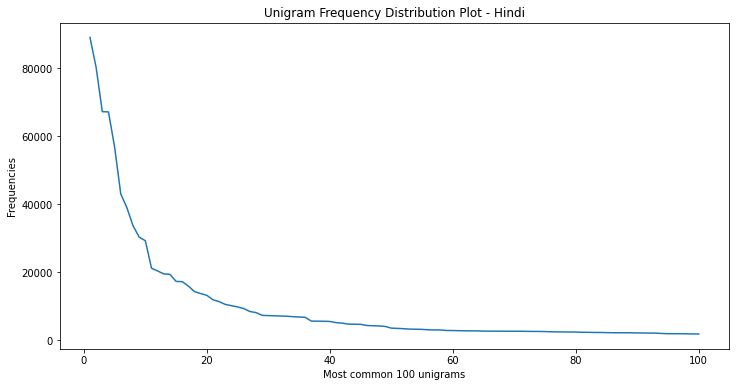

In [ ]:
# Unigrams and plot for frequency distribution

uni_grams_hi = ngrams(word_tokenize_list_hi,1)
fdist_uni_hi = nltk.FreqDist(uni_grams_hi)

freq_values = sorted(fdist_uni_hi.values(), reverse=True)
x_labels = [ i for i in range(1,101)]
plt.figure(figsize=(12, 6))
plt.title("Unigram Frequency Distribution Plot - Hindi")
plt.xlabel("Most common 100 unigrams")
plt.ylabel("Frequencies")
plt.plot(x_labels,freq_values[:100])
plt.show()

### 1.3.1.3

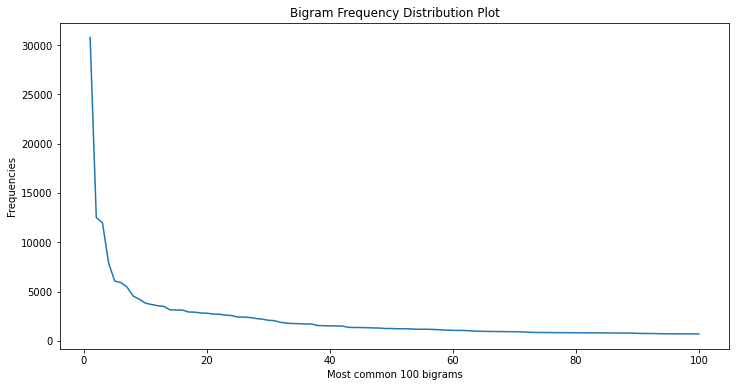

In [ ]:
# Bigrams and plot for frequency distribution

bi_grams_hi = ngrams(word_tokenize_list_hi,2)
fdist_bi_hi = nltk.FreqDist(bi_grams_hi)

freq_values = sorted(fdist_bi_hi.values(), reverse=True)
x_labels = [ i for i in range(1,101) ]
plt.figure(figsize=(12, 6))
plt.title("Bigram Frequency Distribution Plot")
plt.xlabel("Most common 100 bigrams")
plt.ylabel("Frequencies")
plt.plot(x_labels,freq_values[:100])
plt.show()

### 1.3.1.4

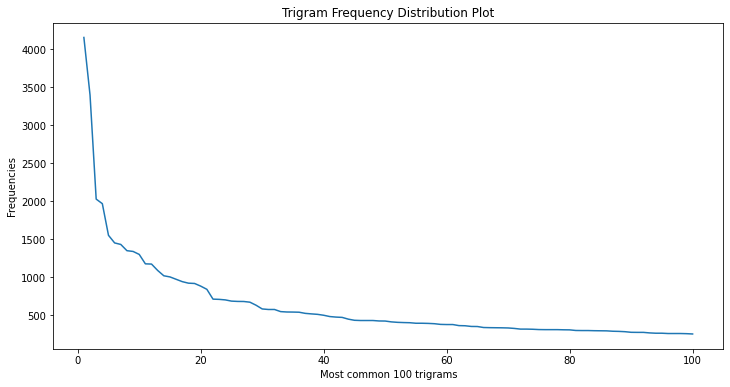

In [ ]:
# Trigrams and plot for frequency distribution

tri_grams_hi = ngrams(word_tokenize_list_hi,3)
fdist_tri_hi = nltk.FreqDist(tri_grams_hi)

freq_values = sorted(fdist_tri_hi.values(), reverse=True)
x_labels = [ i for i in range(1,101) ]
plt.figure(figsize=(12, 6))
plt.title("Trigram Frequency Distribution Plot")
plt.xlabel("Most common 100 trigrams")
plt.ylabel("Frequencies")
plt.plot(x_labels,freq_values[:100])
plt.show()

### Zipf's law curve fitting

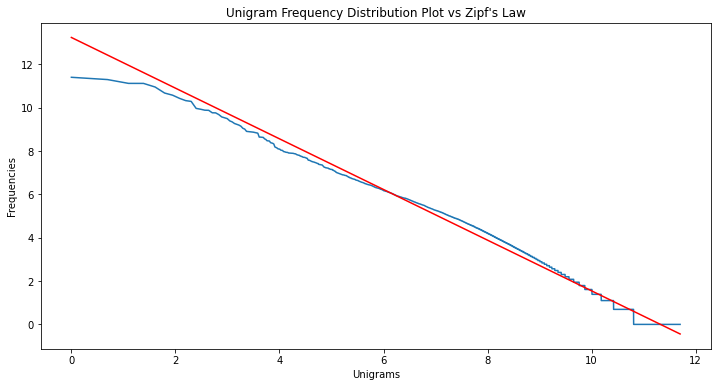

Slope: -1.1687693027291786
Intercept: 13.234523105816232


In [ ]:
# Getting log values for frequency plot
freq_values = sorted(fdist_uni_hi.values(), reverse=True)
x_labels = [ i for i in range(1,len(freq_values)+1) ]
log_freq_values = np.asarray([np.log(i) for i in freq_values])
log_x_labels = np.asarray([np.log(i) for i in x_labels])
plt.figure(figsize=(12, 6))
plt.title("Unigram Frequency Distribution Plot vs Zipf's Law")
plt.xlabel("Unigrams")
plt.ylabel("Frequencies")

slope, intercept = np.polyfit(log_x_labels, log_freq_values, 1)
plt.plot(log_x_labels,log_freq_values)
plt.plot(log_x_labels, slope*log_x_labels+intercept, color="red")
plt.show()
print("Slope: "+str(slope))
print("Intercept: "+str(intercept))

## 1.3.2 Few Basic Questions

In [ ]:
def get_coverage_number(total_grams, percentage, freq_values):
  required_grams = 0
  gram_coverage = 0
  for freq in freq_values:
    if gram_coverage <= percentage*total_grams:
      required_grams += 1
      gram_coverage += freq
    else:
      break
  return required_grams

### 1.3.2.1

In [ ]:
total_unigrams = fdist_uni_hi.N()
freq_values = sorted(fdist_uni_hi.values(), reverse=True)
required_unigrams = get_coverage_number(total_unigrams, 0.9, freq_values)
print("Total number of unigrams: "+str(total_unigrams))
print("Uni-grams required for 90% coverage: "+str(required_unigrams))

Total number of unigrams: 2160191
Uni-grams required for 90% coverage: 11658


### 1.3.2.2

In [ ]:
total_bigrams = fdist_bi_hi.N()
freq_values = sorted(fdist_bi_hi.values(), reverse=True)
required_bigrams = get_coverage_number(total_bigrams, 0.8, freq_values)
print("Total number of bigrams: "+str(total_bigrams))
print("Bi-grams required for 80% coverage: "+str(required_bigrams))

Total number of bigrams: 2160190
Bi-grams required for 80% coverage: 366558


### 1.3.2.3

In [ ]:
total_trigrams = fdist_tri_hi.N()
freq_values = sorted(fdist_tri_hi.values(), reverse=True)
required_trigrams = get_coverage_number(total_trigrams, 0.7, freq_values)
print("Total number of trigrams: "+str(total_trigrams))
print("Tri-grams required for 70% coverage: "+str(required_trigrams))

Total number of trigrams: 2160189
Tri-grams required for 70% coverage: 923215


### 1.3.2.4

In [ ]:
def generate_stem_words(word):
		suffixes = {
    1: [u"ो",u"े",u"ू",u"ु",u"ी",u"ि",u"ा"],
    2: [u"कर",u"ाओ",u"िए",u"ाई",u"ाए",u"ने",u"नी",u"ना",u"ते",u"ीं",u"ती",u"ता",u"ाँ",u"ां",u"ों",u"ें"],
    3: [u"ाकर",u"ाइए",u"ाईं",u"ाया",u"ेगी",u"ेगा",u"ोगी",u"ोगे",u"ाने",u"ाना",u"ाते",u"ाती",u"ाता",u"तीं",u"ाओं",u"ाएं",u"ुओं",u"ुएं",u"ुआं"],
    4: [u"ाएगी",u"ाएगा",u"ाओगी",u"ाओगे",u"एंगी",u"ेंगी",u"एंगे",u"ेंगे",u"ूंगी",u"ूंगा",u"ातीं",u"नाओं",u"नाएं",u"ताओं",u"ताएं",u"ियाँ",u"ियों",u"ियां"],
    5: [u"ाएंगी",u"ाएंगे",u"ाऊंगी",u"ाऊंगा",u"ाइयाँ",u"ाइयों",u"ाइयां"],
}
		for L in 5, 4, 3, 2, 1:
			if len(word) > L + 1:
				for suf in suffixes[L]:
					if word.endswith(suf):
						return word[:-L]
		return word

stemmed_words_hi = []
for t in word_tokenize_list_hi:
  stemmed_words_hi.append(generate_stem_words(t))

In [ ]:
new_uni_grams = ngrams(stemmed_words_hi,1)
new_fdist_uni = nltk.FreqDist(new_uni_grams)

new_bi_grams = ngrams(stemmed_words_hi,2)
new_fdist_bi = nltk.FreqDist(new_bi_grams)

new_tri_grams = ngrams(stemmed_words_hi,3)
new_fdist_tri = nltk.FreqDist(new_tri_grams)

In [ ]:
total_unigrams = new_fdist_uni.N()
freq_values = sorted(new_fdist_uni.values(), reverse=True)
required_unigrams = get_coverage_number(total_unigrams, 0.9, freq_values)
display(Markdown("### After Stemming"))
print("Total number of unigrams: "+str(total_unigrams))
print("Uni-grams required for 90% coverage: "+str(required_unigrams))

### After Stemming

Total number of unigrams: 2160191
Uni-grams required for 90% coverage: 7179


In [ ]:
total_bigrams = new_fdist_bi.N()
freq_values = sorted(new_fdist_bi.values(), reverse=True)
required_bigrams = get_coverage_number(total_bigrams, 0.8, freq_values)
display(Markdown("### After Stemming"))
print("Total number of bigrams: "+str(total_bigrams))
print("Bi-grams required for 80% coverage: "+str(required_bigrams))

### After Stemming

Total number of bigrams: 2160190
Bi-grams required for 80% coverage: 284614


In [ ]:
total_trigrams = new_fdist_tri.N()
freq_values = sorted(new_fdist_tri.values(), reverse=True)
required_trigrams = get_coverage_number(total_trigrams, 0.7, freq_values)
display(Markdown("### After Stemming"))
print("Total number of trigrams: "+str(total_trigrams))
print("Tri-grams required for 70% coverage: "+str(required_trigrams))

### After Stemming

Total number of trigrams: 2160189
Tri-grams required for 70% coverage: 866237


## 1.3.3 Witing some of basic codes

###  1.3.3.1 Heuristics for sentence segmentation and word tokenization

In [ ]:
sentences_with_heuristics = []
words_with_heuristics = []

token_list = hi_text.split()
token_list_length  = len(token_list)

current_sentence = []
i=0
for token in token_list:
    current_sentence.append(token)
    if token[-1] == '।' or token[-1] == '!' or token[-1] == '?':
      sentences_with_heuristics.append(' '.join(current_sentence))
      current_sentence = []

    if token[-1] == '।' or token[-1] == '!' or token[-1] == '?':
      words_with_heuristics.append(token[:-1])
    else:
      words_with_heuristics.append(token)
    i+=1

In [ ]:
# Repeating 1.3.2

display(Markdown("## Results after implementing heuristics:"))
print("\nNumber of sentences: "+ str(len(sentences_with_heuristics)))
print("First 10 sentences are: ")
print(sentences_with_heuristics[:10])
print("\nNumber of words: "+ str(len(words_with_heuristics)))
print("First 10 words are: ")
print(words_with_heuristics[:10])

uni_grams_hue = ngrams(words_with_heuristics,1)
fdist_uni_hue = nltk.FreqDist(uni_grams_hue)
total_unigrams = fdist_uni_hue.N()
freq_values = sorted(fdist_uni_hue.values(), reverse=True)
required_unigrams = get_coverage_number(total_unigrams, 0.9, freq_values)
print("\nTotal number of unigrams: "+str(total_unigrams))
print("Uni-grams required for 90% coverage: "+str(required_unigrams))

bi_grams_hue = ngrams(words_with_heuristics,2)
fdist_bi_hue = nltk.FreqDist(bi_grams_hue)
total_bigrams = fdist_bi_hue.N()
freq_values = sorted(fdist_bi_hue.values(), reverse=True)
required_bigrams = get_coverage_number(total_bigrams, 0.8, freq_values)
print("\nTotal number of bigrams: "+str(total_bigrams))
print("Bi-grams required for 80% coverage: "+str(required_bigrams))

tri_grams_hue = ngrams(words_with_heuristics,3)
fdist_tri_hue = nltk.FreqDist(tri_grams_hue)
total_trigrams = fdist_tri_hue.N()
freq_values = sorted(fdist_tri_hue.values(), reverse=True)
required_trigrams = get_coverage_number(total_trigrams, 0.8, freq_values)
print("\nTotal number of trigrams: "+str(total_trigrams))
print("Tri-grams required for 70% coverage: "+str(required_trigrams))

## Results after implementing heuristics:


Number of sentences: 79004
First 10 sentences are: 
['मास्टर ऑफ़ हेल्थ एडमिनिस्ट्रेशन या मास्टर ऑफ हेल्थकेयर एडमिनिस्ट्रेशन (एमएचए या एम.एच.ए) स्नातकोत्तर (पोस्ट ग्रेजुएशन) की एक पेशेवर डिग्री है जो स्वास्थ्य प्रशासन के क्षेत्र में दी जाती हैं।', 'यह उन छात्रों को प्रदान की जाती हैं जिन्होंने स्वास्थ्य प्रशासन, अस्पताल प्रबंधन एवं अन्य स्वास्थ्य सेवा संगठनों के क्षेत्र में जरूरी ज्ञान और दक्षता हासिल की हैं।', 'इन पाठ्यक्रमो में परिस्थितियों के अनुसार इनके सरंचना में अंतर हो सकता हैं हालांकि व्यवसायी-शिक्षक मॉडल कार्यक्रम आमतौर पर चिकित्सा, स्वास्थ्य व्यवसायों या संबद्ध स्वास्थ्य के कॉलेजों में पाए जाते हैं, कक्षा-आधारित कार्यक्रम व्यवसाय या सार्वजनिक स्वास्थ्य के कॉलेजों में होते हैं।', 'इस पाठ्यक्रम के अध्ययन के दौरान आम तौर पर विद्यार्थियों को जनसंख्या स्वास्थ्य, स्वास्थ्य देखभाल अर्थशास्त्र, स्वास्थ्य नीति, संगठनात्मक व्यवहार, स्वास्थ्य से जुड़े संगठनों के प्रबंधन, स्वास्थ्य विपणन और संचार, मानव संसाधन प्रबंधन, सूचना प्रणाली प्रबंधन के अध्ययन एवं अन्य क्षेत्रों में व्यावहारिक अनुभ

In [ ]:
def generate_stem_words(word):
		suffixes = {
    1: [u"ो",u"े",u"ू",u"ु",u"ी",u"ि",u"ा"],
    2: [u"कर",u"ाओ",u"िए",u"ाई",u"ाए",u"ने",u"नी",u"ना",u"ते",u"ीं",u"ती",u"ता",u"ाँ",u"ां",u"ों",u"ें"],
    3: [u"ाकर",u"ाइए",u"ाईं",u"ाया",u"ेगी",u"ेगा",u"ोगी",u"ोगे",u"ाने",u"ाना",u"ाते",u"ाती",u"ाता",u"तीं",u"ाओं",u"ाएं",u"ुओं",u"ुएं",u"ुआं"],
    4: [u"ाएगी",u"ाएगा",u"ाओगी",u"ाओगे",u"एंगी",u"ेंगी",u"एंगे",u"ेंगे",u"ूंगी",u"ूंगा",u"ातीं",u"नाओं",u"नाएं",u"ताओं",u"ताएं",u"ियाँ",u"ियों",u"ियां"],
    5: [u"ाएंगी",u"ाएंगे",u"ाऊंगी",u"ाऊंगा",u"ाइयाँ",u"ाइयों",u"ाइयां"],
}
		for L in 5, 4, 3, 2, 1:
			if len(word) > L + 1:
				for suf in suffixes[L]:
					if word.endswith(suf):
						return word[:-L]
		return word

stemmed_words_hi = []
for t in words_with_heuristics:
  stemmed_words_hi.append(generate_stem_words(t))

In [ ]:
new_uni_grams = ngrams(stemmed_words,1)
new_fdist_uni = nltk.FreqDist(new_uni_grams)

new_bi_grams = ngrams(stemmed_words,2)
new_fdist_bi = nltk.FreqDist(new_bi_grams)

new_tri_grams = ngrams(stemmed_words,3)
new_fdist_tri = nltk.FreqDist(new_tri_grams)

In [ ]:
total_unigrams = new_fdist_uni.N()
freq_values = sorted(new_fdist_uni.values(), reverse=True)
required_unigrams = get_coverage_number(total_unigrams, 0.9, freq_values)
display(Markdown("### After Stemming"))
print("Total number of unigrams: "+str(total_unigrams))
print("Uni-grams required for 90% coverage: "+str(required_unigrams))

total_bigrams = new_fdist_bi.N()
freq_values = sorted(new_fdist_bi.values(), reverse=True)
required_bigrams = get_coverage_number(total_bigrams, 0.8, freq_values)
display(Markdown("### After Stemming"))
print("Total number of bigrams: "+str(total_bigrams))
print("Bi-grams required for 80% coverage: "+str(required_bigrams))

total_trigrams = new_fdist_tri.N()
freq_values = sorted(new_fdist_tri.values(), reverse=True)
required_trigrams = get_coverage_number(total_trigrams, 0.7, freq_values)
display(Markdown("### After Stemming"))
print("Total number of trigrams: "+str(total_trigrams))
print("Tri-grams required for 70% coverage: "+str(required_trigrams))

### After Stemming

Total number of unigrams: 4496840
Uni-grams required for 90% coverage: 2571


### After Stemming

Total number of bigrams: 4496839
Bi-grams required for 80% coverage: 123094


### After Stemming

Total number of trigrams: 4496838
Tri-grams required for 70% coverage: 740085


### 1.3.3.2 Liklihood Ratios

In [ ]:
# to calulate the the terms log L(k,n,x)
def get_log_term_L(k, n, x):
  return k*np.log(x) + (n-k)*np.log(1-x)

# to get log(lambda)
def get_likelihood_ratio(c1, c2, c12, N):
  p = c2/N
  p1 = c12/c1
  p2 = (c2-c12)/(N-c1)

  val = get_log_term_L(c12,c1,p) + get_log_term_L(c2-c12,N-c1,p) - get_log_term_L(c12,c1,p1) - get_log_term_L(c2-c12,N-c1,p2)
  if np.isnan(val):
    return 0
  return val

In [ ]:
likelihood_ratios = {}
for bigram,freq in fdist_bi_hi.items():
  word1 = bigram[0]
  word2 = bigram[1]
  c12 = freq
  N = fdist_bi_hi.N()
  c1 = fdist_uni_hi[(word1,)]
  c2 = fdist_uni_hi[(word2,)]
  likelihood_ratios[bigram] = -2*get_likelihood_ratio(c1,c2,c12,N)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
display(Markdown("## 100 words with highest likelihood ratios"))
print(sorted(likelihood_ratios.items(),key= lambda x:x[1],reverse=True)[:100])

## 100 words with highest likelihood ratios

[(('है', '।'), 138558.28638433747), (('के', 'लिए'), 75839.0122588001), (('हैं', '।'), 52223.29362189642), (('जाता', 'है'), 39397.06765825569), (('के', 'साथ'), 26879.791641692253), (('था', '।'), 25167.706349993707), (('किया', 'गया'), 23583.454259396138), (('होता', 'है'), 23315.573542877042), (('रूप', 'में'), 20842.834465311258), (('जा', 'सकता'), 17029.846892680984), (('के', 'रूप'), 16144.255783066714), (('सकता', 'है'), 15367.294202345598), (('है', 'कि'), 14898.116436062177), (('करता', 'है'), 14372.401777799067), (('रूप', 'से'), 14123.598281111452), (('होते', 'हैं'), 13728.739784933481), (('गया', 'था'), 13483.281146736612), (('थे', '।'), 13381.016272630659), (('है', ','), 12710.133101326413), (('करते', 'हैं'), 12688.325505201588), (('होती', 'है'), 11485.132593765098), (('किया', 'जाता'), 10556.51986521708), (('कर', 'दिया'), 10299.36926422784), (('थी', '।'), 10208.206080880365), (('के', 'बाद'), 10049.321393972918), ((',', 'जो'), 9634.942206524844), (('करने', 'के'), 9331.63000571751), (('जा

## 1.3.4 Morphological parsing

In [ ]:
freq_dist_ordered_list = FreqDist(word_tokenize_list_hi).most_common()
most_frequent_words = freq_dist_ordered_list[:100]
least_frequent_words = freq_dist_ordered_list[-100:]

In [ ]:
random.seed(13)
random_5_most_frequent_hi = random.sample(most_frequent_words, 5)
random_5_least_frequent_hi = random.sample(least_frequent_words, 5)

In [ ]:
most_frequent_morphemes = []
for w in random_5_most_frequent_hi:
  w = Word(w[0], language="hi")
  most_frequent_morphemes.append(w.morphemes)
least_frequent_morphemes = []
for w in random_5_least_frequent_hi:
  w = Word(w[0], language="hi")
  least_frequent_morphemes.append(w.morphemes)

text_most_frequent = [i[0] for i in random_5_most_frequent_hi]
text_least_frequent = [i[0] for i in random_5_least_frequent_hi]
pos_tag_most_frequent = pos_tag(text_most_frequent,lang='hi')
pos_tag_least_frequent = pos_tag(text_least_frequent,lang='hi')

display(Markdown("## Morphological Analysis"))
display(Markdown("### For random 5 words from 100 most frequent"))
display(Markdown("### Word --> morphemes + POS Tag"))
for index in range(5):
  print(random_5_most_frequent_hi[index][0] + " --> " + str(most_frequent_morphemes[index]) + " + " + pos_tag_most_frequent[index][1])
display(Markdown("### For random 5 words from 100 least frequent"))
display(Markdown("### Word --> morphemes + POS Tag"))
for index in range(5):
  print(random_5_least_frequent_hi[index][0] + " --> " + str(least_frequent_morphemes[index]) + " + " + pos_tag_least_frequent[index][1])

## Morphological Analysis

### For random 5 words from 100 most frequent

### Word --> morphemes + POS Tag

जाता --> ['जा', 'ता'] + JJ
द्वारा --> ['द्वारा'] + NNP
जैसे --> ['जैस', 'े'] + NNP
कि --> ['कि'] + NNP
किसी --> ['किस', 'ी'] + NN


### For random 5 words from 100 least frequent

### Word --> morphemes + POS Tag

दरजी --> ['दर', 'जी'] + JJ
आधीनस्थ --> ['आध', 'ी', 'न', 'स्थ'] + NNP
एक्सटीरियर --> ['एक्स', 'टी', 'रियर'] + NNP
मूर्खतापूर्ण --> ['मूर्ख', 'ता', 'पूर्ण'] + NNP
मोर्गेसों --> ['मोर्', 'गे', 'स', 'ों'] + NN


## 1.3.5 Sub-word tokenization(BPE)

In [ ]:
# Defining functions for BPE

def get_vocab(freq_dist):
  vocab = {}
  for key, value in freq_dist.items():
    if(len(key[0])>=3):
      word = " ".join(key[0]) + " </w>"
      vocab[word] = value
  return vocab

def get_stats(vocab):
    pairs = collections.defaultdict(int)
    for word, freq in vocab.items():
      symbols = word.split()
      for i in range(len(symbols)-1):
        pairs[symbols[i],symbols[i+1]] += freq
    return pairs

def merge_vocab(pair, v_in):
    v_out = {}
    bigram = re.escape(' '.join(pair))
    p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')
    for word in v_in:
      w_out = p.sub(''.join(pair), word)
      v_out[w_out] = v_in[word]
    return v_out

def get_tokens(pair, v_in): 
  v_out = []
  bigram = re.escape(' '.join(pair))
  p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')
 
  for word in v_in:
    w_out = p.sub(''.join(pair), word)
    v_out.append(w_out)

  return v_out

In [ ]:
# Leaning merges

fdist_uni_dict = dict(fdist_uni_hi)
vocab = dict(list(get_vocab(fdist_uni_dict).items())[:3000])

learned_merges = []
num_merges = 4500

for i in range(num_merges):
    pairs = get_stats(vocab)
    if not pairs:
      print("I broke at " + str(i))
      break
    best = max(pairs, key=pairs.get)
    learned_merges.append((best,pairs[best]))
    vocab = merge_vocab(best, vocab)

In [ ]:
sorted_learned_merges = sorted(learned_merges, key = lambda x: x[1])
display(Markdown("### 50 most frequent tokens"))
print(sorted_learned_merges[-50:])
display(Markdown("### 50 least frequent tokens"))
print(sorted_learned_merges[:50])

### 50 most frequent tokens

[(('र', 'ू'), 10560), (('द', 'ि'), 10573), (('स', 'ं'), 11294), (('उ', 'न'), 11403), (('ग', '</w>'), 11428), (('ह', 'ु'), 11551), (('्य', '</w>'), 11673), (('य', '</w>'), 11930), (('स', 'े</w>'), 12532), (('र', '</w>'), 12663), (('म', 'ा'), 13019), (('त', 'े</w>'), 13398), (('त', 'ि'), 13428), (('न', 'ा</w>'), 13612), (('स', 'ा'), 13679), (('कि', 'या</w>'), 13750), (('म', '</w>'), 13922), (('लि', 'ए</w>'), 13954), (('क', '्'), 14344), (('ो', 'ं</w>'), 14572), (('ल', '</w>'), 14610), (('ार', '</w>'), 14610), (('ज', 'ा'), 16903), (('स', 'क'), 17475), (('व', 'ि'), 17725), (('ह', 'ो'), 18819), (('र', '्'), 19149), (('ल', 'ि'), 19176), (('क', '</w>'), 20270), (('ए', '</w>'), 21088), (('ह', 'ैं</w>'), 21224), (('ै', 'ं</w>'), 21736), (('क', 'र'), 21886), (('स', '्'), 23207), (('क', 'ि'), 25789), (('प', '्र'), 25857), (('त', 'ा</w>'), 26575), (('त', '</w>'), 28946), (('न', 'े</w>'), 29838), (('्', 'य'), 30298), (('न', '</w>'), 34005), (('य', 'ा</w>'), 36984), (('ा', 'र'), 38860), (('्', 'र'),

### 50 least frequent tokens

[(('एच', 'ए</w>'), 5), (('स्नात', 'कों</w>'), 5), (('सम', 'वर्ती</w>'), 5), (('अ', 'सा'), 5), (('अस', 'दु'), 5), (('असदु', 'द्दीन</w>'), 5), (('i', 'n'), 5), (('हा', 'फि'), 5), (('हाफि', 'ज</w>'), 5), (('हि', 'ंदु'), 5), (('नारा', 'जग'), 5), (('नाराजग', 'ी</w>'), 5), (('पुन', 'रा'), 5), (('अनु', 'क्रमणी</w>'), 5), (('त्', '</w>'), 5), (('निर्', 'व'), 5), (('निर्व', 'चन</w>'), 5), (('शौन', 'क</w>'), 5), (('गद्या', 'त्मक</w>'), 5), (('प्रण', 'े'), 5), (('प्रणे', 'ता</w>'), 5), (('परिच', 'या'), 5), (('परिचया', 'त्मक</w>'), 5), (('ऑ', 'क्स'), 5), (('ऑक्स', 'फ़र्'), 5), (('ग्रेजु', 'एशन</w>'), 6), (('सर', 'ं'), 6), (('सरं', 'चना</w>'), 6), (('ग्रेजु', 'एट</w>'), 6), (('बी', 'डी'), 6), (('बीडी', 'एस</w>'), 6), (('बीए', 'स'), 6), (('बीएस', 'सी</w>'), 6), (('द', 'ं'), 6), (('दं', 'पति</w>'), 6), (('स', 'ई'), 6), (('सई', 'द</w>'), 6), (('न', 'ारा'), 6), (('ज', 'य'), 6), (('वा', 'ङ'), 6), (('वाङ', '्म'), 6), (('वाङ्म', 'य</w>'), 6), (('या', 'ँ</w>'), 6), (('उ', 'सी</w>'), 6), (('य', 'थ'), 6), ((

In [ ]:
# Tokenization for 10 unknown words
unknown_words = ['विभीषिका', 'किंकर्तव्यविमूढ़', 'व्योमबाला', 'वैतरिणी', 'निक्षेपक', 'स्वतांत्रयोत्तर', 'रासस्मीकरण', 'धृष्टता', 'अच्युतानंद', 'प्रत्युत्पन्नमति ']

unknown_words_list = [ ' '.join(w)+" </w>" for w in unknown_words]
for lm in learned_merges:
  unknown_words_list = get_tokens(lm[0], unknown_words_list)

display(Markdown("## Tokenization of unknown words"))
for i in range(10):
  print(unknown_words[i] + ' --> ' + str(unknown_words_list[i][:-4].split()))

## Tokenization of unknown words

विभीषिका --> ['वि', 'भी', 'ष', 'ि', 'का']
किंकर्तव्यविमूढ़ --> ['कि', 'ं', 'कर्', 'त', 'व्य', 'वि', 'मू', 'ढ़']
व्योमबाला --> ['व्य', 'ो', 'म', 'ब', 'ाला']
वैतरिणी --> ['वै', 'त', 'रि', 'णी']
निक्षेपक --> ['नि', 'क्षे', 'प', 'क']
स्वतांत्रयोत्तर --> ['स्व', 'ता', 'ं', 'त्र', 'यो', 'त्तर']
रासस्मीकरण --> ['रा', 'स', 'स्', 'मी', 'करण']
धृष्टता --> ['ध', 'ृ', 'ष्ट', 'ता']
अच्युतानंद --> ['अ', 'च', '्य', 'ु', 'ता', 'न', 'ंद']
प्रत्युत्पन्नमति  --> ['प्रत्य', 'ु', 'त्', 'प', 'न्', 'न', 'म', 'ति']


In [ ]:
display(Markdown("## Comparison of tokens with morphemes"))

unknown_words_list = [ ' '.join(w[0])+" </w>" for w in random_5_most_frequent_hi]
for lm in learned_merges:
  unknown_words_list = get_tokens(lm[0], unknown_words_list)

display(Markdown("### For random 5 words from 100 most frequent"))
print("\nWord" + "    -->    " + "From Polyglot" + "    and    " + "From BPE \n" )
i=0
for pair in random_5_most_frequent_hi:
  word = pair[0]
  morphemes = Word(word, language="hi").morphemes
  print(word + "    -->    " + str(morphemes) + "    and    " +str(unknown_words_list[i][:-4].split()) + ' \n')
  i+=1

unknown_words_list = [ ' '.join(w[0])+" </w>" for w in random_5_least_frequent_hi]
for lm in learned_merges:
  unknown_words_list = get_tokens(lm[0], unknown_words_list)

display(Markdown("### For random 5 words from 100 least frequent"))
print("\nWord" + "    -->    " + "From Polyglot" + "    and    " + "From BPE \n" )
i=0
for pair in random_5_least_frequent_hi:
  word = pair[0]
  morphemes = Word(word, language="hi").morphemes
  print(word + "    -->    " + str(morphemes) + "    and    " +str(unknown_words_list[i][:-4].split()) + ' \n')
  i+=1

## Comparison of tokens with morphemes

### For random 5 words from 100 most frequent


Word    -->    From Polyglot    and    From BPE 

जाता    -->    ['जा', 'ता']    and    ['जाता'] 

द्वारा    -->    ['द्वारा']    and    ['द्वारा'] 

जैसे    -->    ['जैस', 'े']    and    ['जैसे'] 

कि    -->    ['कि']    and    ['कि'] 

किसी    -->    ['किस', 'ी']    and    ['किसी'] 



### For random 5 words from 100 least frequent


Word    -->    From Polyglot    and    From BPE 

दरजी    -->    ['दर', 'जी']    and    ['दर', 'जी'] 

आधीनस्थ    -->    ['आध', 'ी', 'न', 'स्थ']    and    ['आध', 'ी', 'न', 'स्थ'] 

एक्सटीरियर    -->    ['एक्स', 'टी', 'रियर']    and    ['ए', 'क्स', 'टी', 'रि', 'यर'] 

मूर्खतापूर्ण    -->    ['मूर्ख', 'ता', 'पूर्ण']    and    ['मू', 'र्', 'ख', 'त', 'ाप', 'ूर्', 'ण'] 

मोर्गेसों    -->    ['मोर्', 'गे', 'स', 'ों']    and    ['मो', 'र्', 'गे', 'सों'] 



In [ ]:
# Alternative way to download files
# Uploading files by mounting google drive
# from google.colab import drive
# drive.mount('/content/drive')